NETWORK ANAMOLY DETECTION:

EXPLORATORY DATA ANALYSIS(EDA) AND HYPOTHESIS

Importing all the neccessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/Network_anomaly_data.csv")
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


Distribution of features

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'srcbytes'}>,
        <Axes: title={'center': 'dstbytes'}>,
        <Axes: title={'center': 'land'}>,
        <Axes: title={'center': 'wrongfragment'}>,
        <Axes: title={'center': 'urgent'}>],
       [<Axes: title={'center': 'hot'}>,
        <Axes: title={'center': 'numfailedlogins'}>,
        <Axes: title={'center': 'loggedin'}>,
        <Axes: title={'center': 'numcompromised'}>,
        <Axes: title={'center': 'rootshell'}>,
        <Axes: title={'center': 'suattempted'}>],
       [<Axes: title={'center': 'numroot'}>,
        <Axes: title={'center': 'numfilecreations'}>,
        <Axes: title={'center': 'numshells'}>,
        <Axes: title={'center': 'numaccessfiles'}>,
        <Axes: title={'center': 'numoutboundcmds'}>,
        <Axes: title={'center': 'ishostlogin'}>],
       [<Axes: title={'center': 'isguestlogin'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'srvcount

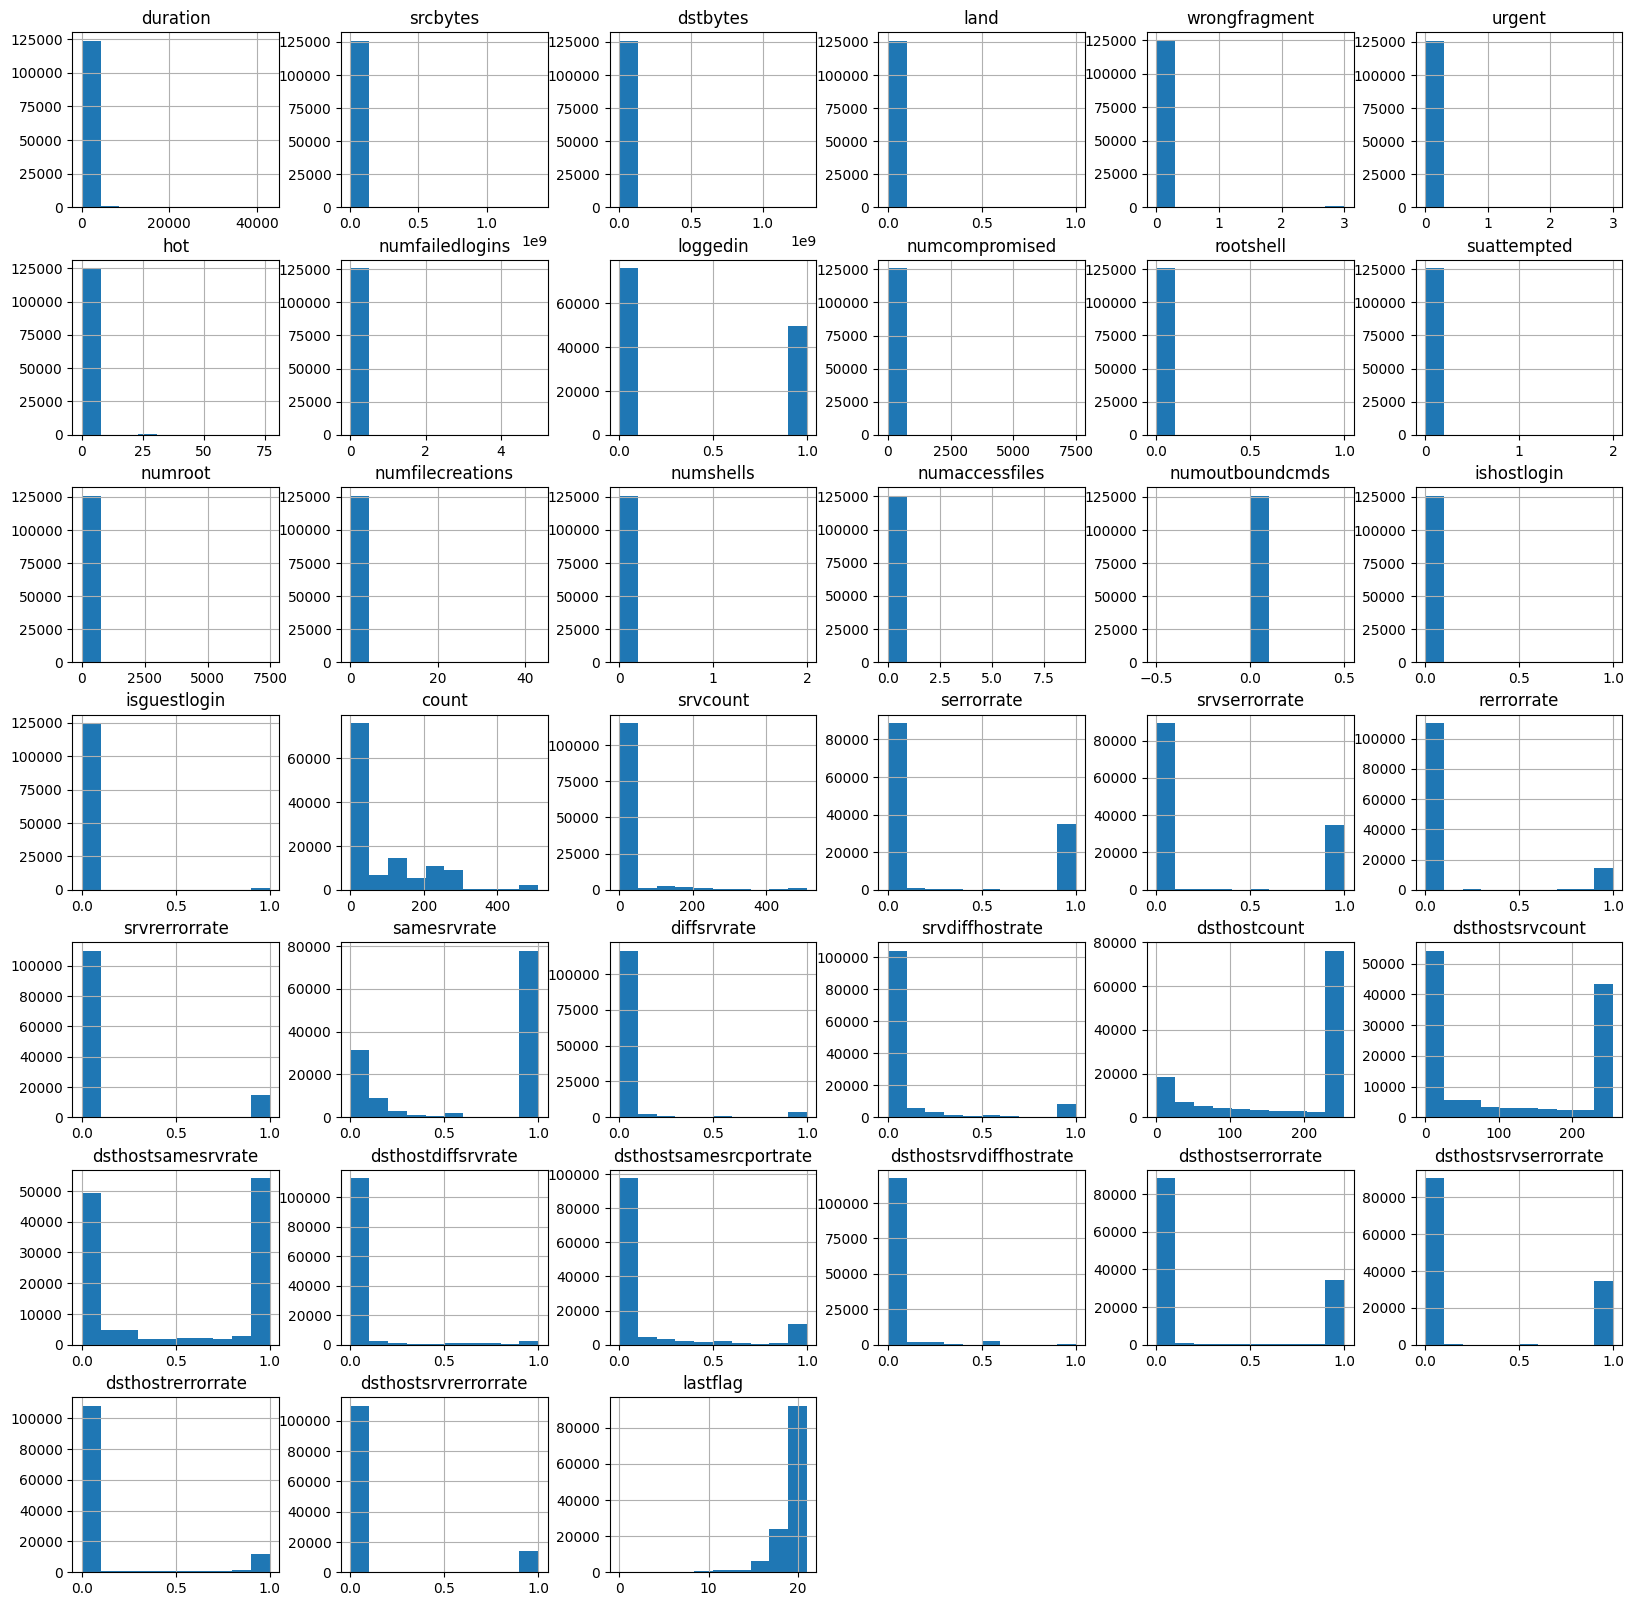

In [2]:
df.describe()
df.hist(figsize=(20, 20))


Checking Missing Values

In [3]:
df.isnull().sum()

,0
duration,0
protocoltype,0
service,0
flag,0
srcbytes,0
dstbytes,0
land,0
wrongfragment,0
urgent,0
hot,0


Encoding Categorical Variables for Analysis

In [5]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

Correlation Analysis

<Axes: >

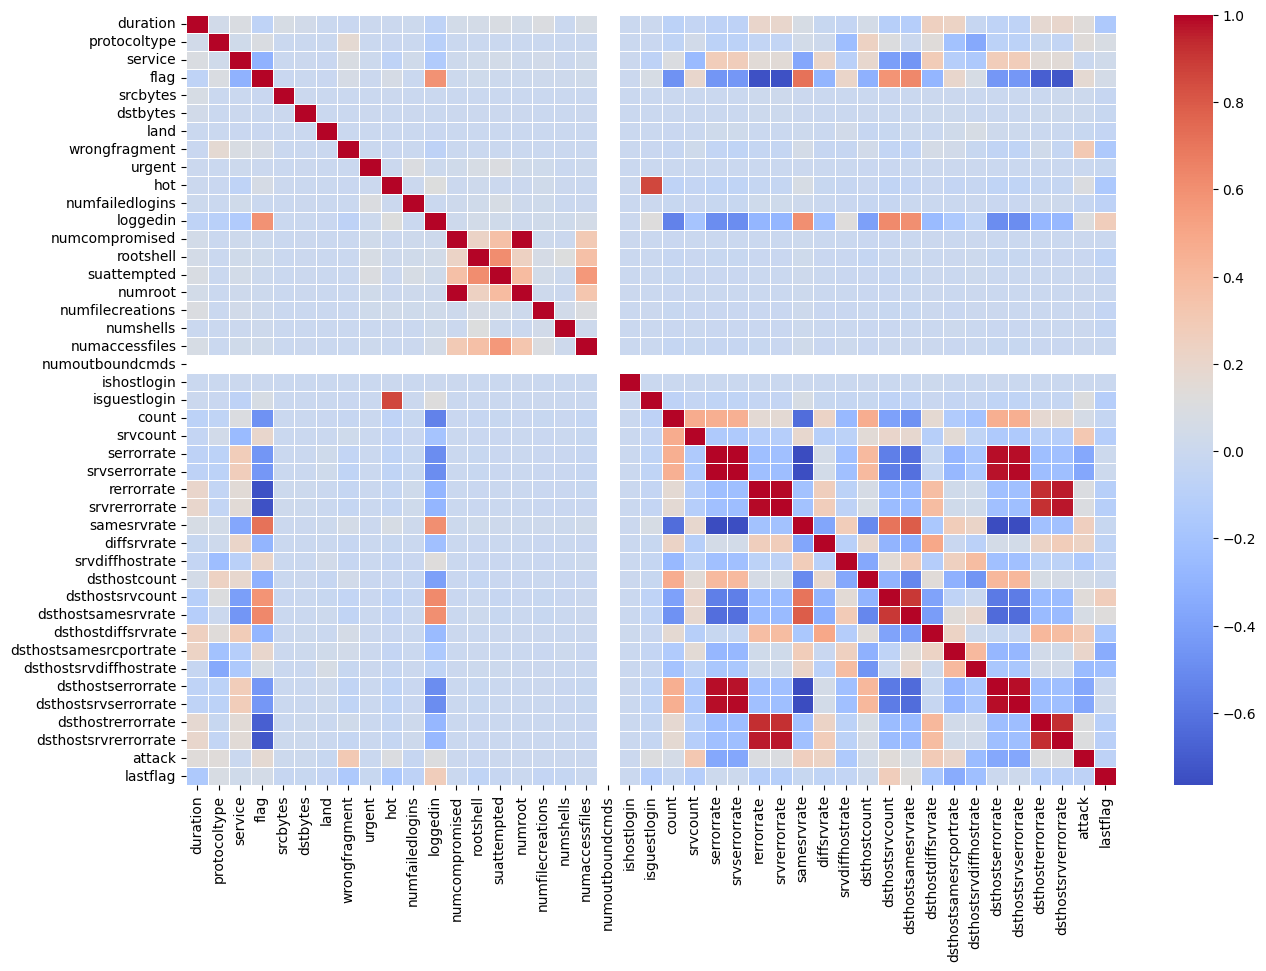

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)

Hypothesis Testing
Hypothesis 1: Dst_bytes differs for anomaly and normal traffic

In [13]:
# Clean up column names
df.columns = df.columns.str.strip().str.lower()

# Print column names immediately before accessing 'dst_bytes' and 'flag'
print("Columns after cleaning:")
print(df.columns.tolist())

# Assume 'flag' column now cleaned to 'flag'
# Check if 'flag' and 'dst_bytes' exist before proceeding
if 'flag' in df.columns and 'dst_bytes' in df.columns:
    normal = df[df['flag'] == 0]['dst_bytes']
    anomaly = df[df['flag'] == 1]['dst_bytes']

    from scipy.stats import ttest_ind
    t_stat, p_val = ttest_ind(normal, anomaly, equal_var=False)
    print(f"T-statistic: {t_stat}, P-value: {p_val}")
else:
    # This message will now be more informative as we've checked for both columns
    missing_cols = [col for col in ['flag', 'dst_bytes'] if col not in df.columns]
    print(f"Missing columns: {missing_cols}. Please check the label column name or feature column name.")

Columns after cleaning:
['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin', 'numcompromised', 'rootshell', 'suattempted', 'numroot', 'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate', 'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag']
Missing columns: ['dst_bytes']. Please check the label column name or feature column name.


In [8]:
print(df.columns.tolist())

['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin', 'numcompromised', 'rootshell', 'suattempted', 'numroot', 'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate', 'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag']


In [15]:
# Clean up column names
df.columns = df.columns.str.strip().str.lower()

# Print column names
print(df.columns.tolist())

# Assume 'flag' column now cleaned to 'flag'
if 'flag' in df.columns:
    normal = df[df['flag'] == 0]['dstbytes']
    anomaly = df[df['flag'] == 1]['dstbytes']

    from scipy.stats import ttest_ind
    t_stat, p_val = ttest_ind(normal, anomaly, equal_var=False)
    print(f"T-statistic: {t_stat}, P-value: {p_val}")
else:
    print("No 'flag' column found. Please check the label column name.")

['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin', 'numcompromised', 'rootshell', 'suattempted', 'numroot', 'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate', 'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag']
T-statistic: 1.92656908885757, P-value: 0.06036306251485131


In [18]:
normal = df[df['flag'] == 0]['dstbytes']
anomaly = df[df['flag'] == 1]['dstbytes']
ttest_ind(normal, anomaly)


TtestResult(statistic=np.float64(30.43600889429793), pvalue=np.float64(1.307291427354502e-195), df=np.float64(11277.0))

 Hypothesis 2: Protocol_type affects anomalies

In [19]:
contingency = pd.crosstab(df['protocoltype'], df['flag'])
chi2_contingency(contingency)


Chi2ContingencyResult(statistic=np.float64(19448.092923692475), pvalue=np.float64(0.0), dof=20, expected_freq=array([[3.02752177e+00, 7.39307653e+02, 1.02804109e+02, 6.77901614e+00,
        1.59339787e+02, 2.29374264e+03, 2.40227271e+01, 8.35859271e+00,
        3.22496884e+00, 4.93255694e+03, 1.78360522e+01],
       [3.74976701e+01, 9.15676801e+03, 1.27329045e+03, 8.39621744e+01,
        1.97351868e+03, 2.84093761e+04, 2.97535861e+02, 1.03526176e+02,
        3.99431704e+01, 6.10926715e+04, 2.20910187e+02],
       [5.47480809e+00, 1.33692433e+03, 1.85905440e+02, 1.22588094e+01,
        2.88141530e+02, 4.14788124e+03, 4.34414120e+01, 1.51152310e+01,
        5.83186080e+00, 8.91977158e+03, 3.22537607e+01]]))

Hypothesis 3: Urgent packets increase anomaly likelihood

<Axes: xlabel='flag', ylabel='urgent'>

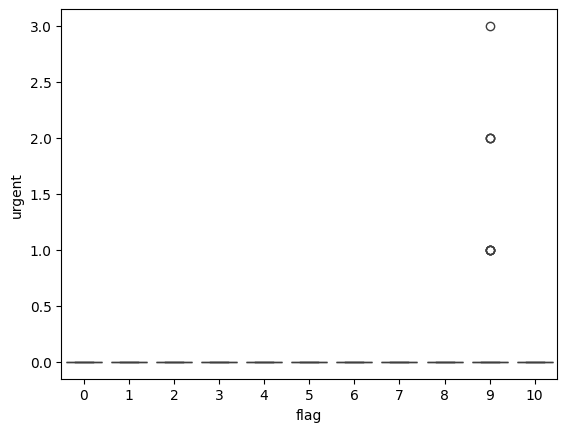

In [21]:
sns.boxplot(x='flag', y='urgent', data=df)


BLOCK 3: Machine Learning Modeling


1. Preprocessing

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['flag'], axis=1)  # Assuming 'Flag' is the target
y = df['flag']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


2, Model Training(Random Forest)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.96      0.99      0.97      2255
           2       0.91      0.73      0.81       292
           3       1.00      0.90      0.95        20
           4       0.97      0.96      0.97       480
           5       1.00      1.00      1.00      6969
           6       0.82      0.73      0.77        81
           7       0.57      0.32      0.41        25
           8       1.00      0.46      0.63        13
           9       1.00      1.00      1.00     14985
          10       1.00      0.99      0.99        69

    accuracy                           0.99     25195
   macro avg       0.93      0.81      0.86     25195
weighted avg       0.99      0.99      0.99     25195

[[    5     0     0     0     0     0     0     0     0     1     0]
 [    0  2222    20     0    13     0     0     0     0     0     0]
 [    0    71   214     0     2     0     0     0

Made some changes and Save the Model

In [25]:
# Step 2: Identify categorical columns (excluding the target 'attack' for now)
# We will encode the target 'attack' separately
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Check if 'attack' is in the original categorical columns and remove it
if 'attack' in categorical_cols:
    categorical_cols.remove('attack')

# Label encode the target column 'attack'
from sklearn.preprocessing import LabelEncoder
le_target = LabelEncoder()
df['attack_encoded'] = le_target.fit_transform(df['attack'])


# Step 3: Label encode the remaining categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 4: Define features and labels
# Drop the original 'attack' column and the 'attack_encoded' column from features
# Use 'attack_encoded' as the target variable
X = df.drop(['attack', 'attack_encoded'], axis=1)
y = df['attack_encoded']

# Step 5: Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 8: Save the model, scaler, target encoder, and column names
import joblib

joblib.dump(model, 'anomalymodel_v2.pkl')
joblib.dump(scaler, 'scaler_v2.pkl')
joblib.dump(le_target, 'labelencoder.pkl')                 # For target label
joblib.dump(X.columns.tolist(), 'columns_used.pkl')       # Feature columns

['columns_used.pkl']